# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
print(f'df_data have {df_data.shape[0]} rows and {df_data.shape[1]} columns')
print(f'column names in df_data: {df_data.columns}')


df_data have 962 rows and 16 columns
column names in df_data: Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')


In [6]:
print('first nobel price awarded year: ')
df_data.sort_values('year', ascending=True).head()

first nobel price awarded year: 


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL


In [7]:
print('latest year nobel price year:')
df_data.sort_values('year', ascending=True).tail()

latest year nobel price year:


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
956,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Harvey J. Alter,1935-09-12,"New York, NY",United States of America,United States of America,Male,National Institutes of Health,"Bethesda, MD",United States of America,USA
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,1/2,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [9]:
print(f'Does the given data set have any duplicate values?: {df_data.duplicated().any()}')
print(f'Does the given data set have any NaN values?: {df_data.isna().values.any()}')

Does the given data set have any duplicate values?: False
Does the given data set have any NaN values?: True


In [10]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Check for NaN Values

In [11]:
col_subset = ['year', 'category', 'laureate_type', 'birth_date','full_name', 'organization_name','organization_city','birth_city']
df_data.loc[(df_data.birth_date.isna())][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name,organization_city,birth_city
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN,NaN,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN,NaN,NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN,NaN,NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN,NaN,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN


In [12]:
df_data.loc[(df_data.organization_name.isna())][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name,organization_city,birth_city
1,1901,Literature,Individual,1839-03-16,Sully Prudhomme,NaN,NaN,Paris
3,1901,Peace,Individual,1822-05-20,Frédéric Passy,NaN,NaN,Paris
4,1901,Peace,Individual,1828-05-08,Jean Henry Dunant,NaN,NaN,Geneva
7,1902,Literature,Individual,1817-11-30,Christian Matthias Theodor Mommsen,NaN,NaN,Garding
9,1902,Peace,Individual,1843-05-21,Charles Albert Gobat,NaN,NaN,Tramelan
...,...,...,...,...,...,...,...,...
932,2018,Peace,Individual,1993-07-02,Nadia Murad,NaN,NaN,Kojo
942,2019,Literature,Individual,1942-12-06,Peter Handke,NaN,NaN,Griffen
946,2019,Peace,Individual,1976-08-15,Abiy Ahmed Ali,NaN,NaN,Beshasha
954,2020,Literature,Individual,1943-04-22,Louise Glück,NaN,NaN,"New York, NY"


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [13]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [14]:
price_split = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(price_split[0])
denominator = pd.to_numeric(price_split[1])
df_data['share_percent'] = numerator/denominator

In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [16]:
df_data.sample(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_percent
733,2001,Physics,The Nobel Prize in Physics 2001,"""for the achievement of Bose-Einstein condensa...",1/3,Individual,Wolfgang Ketterle,1957-10-21,Heidelberg,West Germany (Germany),Germany,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,DEU,0.33
150,1929,Physics,The Nobel Prize in Physics 1929,"""for his discovery of the wave nature of elect...",1/1,Individual,Prince Louis-Victor Pierre Raymond de Broglie,1892-08-15,Dieppe,France,France,Male,Sorbonne University,Paris,France,FRA,1.00
524,1981,Physics,The Nobel Prize in Physics 1981,"""for their contribution to the development of ...",1/4,Individual,Arthur Leonard Schawlow,1921-05-05,"Mount Verno, NY",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA,0.25
920,2017,Physics,The Nobel Prize in Physics 2017,“for decisive contributions to the LIGO detect...,1/4,Individual,Barry C. Barish,1936-01-27,"Omaha, NE",United States of America,United States of America,Male,LIGO/VIRGO Collaboration,NaN,NaN,USA,0.25
910,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,Individual,J. Michael Kosterlitz,1943-06-22,Aberdeen,United Kingdom,United Kingdom,Male,Brown University,"Providence, RI",United States of America,GBR,0.25


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [17]:
gender = df_data.sex.value_counts()
fig = px.pie(labels=gender.index,
            values = gender.values,
            title = 'Percentage of Male vs Female Nobel Price Winners',
            names= gender.index,
            hole=0.5)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='label+percent')

fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [18]:
df_data.head()

col_subset = ['year','full_name','prize','category','birth_country']

df_data[df_data.sex == 'Female'].sort_values('year', ascending=True)[:3][col_subset]

,year,full_name,prize,category,birth_country
18,1903,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903,Physics,Russian Empire (Poland)
29,1905,"Baroness Bertha Sophie Felicita von Suttner, n...",The Nobel Peace Prize 1905,Peace,Austrian Empire (Czech Republic)
51,1909,Selma Ottilia Lovisa Lagerlöf,The Nobel Prize in Literature 1909,Literature,Sweden


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [19]:
repeated_winners = df_data.loc[df_data.duplicated(subset=['full_name'], keep=False)]
col_subset = ['year', 'full_name', 'category', 'laureate_type', 'sex']
repeated_winners[col_subset]

,year,full_name,category,laureate_type,sex
18,1903,"Marie Curie, née Sklodowska",Physics,Individual,Female
62,1911,"Marie Curie, née Sklodowska",Chemistry,Individual,Female
89,1917,Comité international de la Croix Rouge (Intern...,Peace,Organization,NaN
215,1944,Comité international de la Croix Rouge (Intern...,Peace,Organization,NaN
278,1954,Linus Carl Pauling,Chemistry,Individual,Male
283,1954,Office of the United Nations High Commissioner...,Peace,Organization,NaN
297,1956,John Bardeen,Physics,Individual,Male
306,1958,Frederick Sanger,Chemistry,Individual,Male
340,1962,Linus Carl Pauling,Peace,Individual,Male
348,1963,Comité international de la Croix Rouge (Intern...,Peace,Organization,NaN


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [20]:
print(f'Categories of Nobel price awarded: {df_data.category.unique()}')
df_data.category.nunique()

Categories of Nobel price awarded: ['Chemistry' 'Literature' 'Medicine' 'Peace' 'Physics' 'Economics']


6

In [21]:
prices_per_category = df_data.category.value_counts()
v_bar = px.bar(
    x = prices_per_category.index,
    y = prices_per_category.values,
    color = prices_per_category.values,
    color_continuous_scale = 'Aggrnyl',
    title = 'Number of prices awarded per category',
)

v_bar.update_layout(xaxis_title = 'Nobel Price Category',
                    coloraxis_showscale=False,
                    yaxis_title = 'Number of Prices')

v_bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [22]:
df_data[df_data.category == 'Economics'].sort_values('year', ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_percent
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [23]:
category_men_women = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
category_men_women = category_men_women.sort_values('prize', ascending=False)
category_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [24]:
v_bar_split = px.bar(
    x = category_men_women.category,
    y = category_men_women.prize,
    color = category_men_women.sex,
    title= 'Number of prizes awarded as per category split by men and women'
)

v_bar_split.update_layout(
    xaxis_title = 'Nobel Prize Category',
    yaxis_title = 'Number of Prizes'
)

v_bar_split.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [25]:
prize_per_year = df_data.groupby('year').count().prize
moving_avg = prize_per_year.rolling(window=5).mean()
moving_avg

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

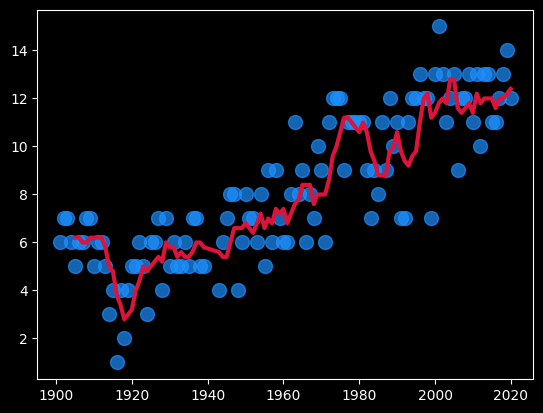

In [26]:
plt.scatter(x = prize_per_year.index,
            y = prize_per_year.values,
            c = 'dodgerblue',
            alpha=0.7,
            s=100
            )

plt.plot(
    prize_per_year.index,
    moving_avg.values,
    c='crimson',
    linewidth = 3
        )

plt.show()

In [27]:
np.arange(1900, 2021, step=5)


array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

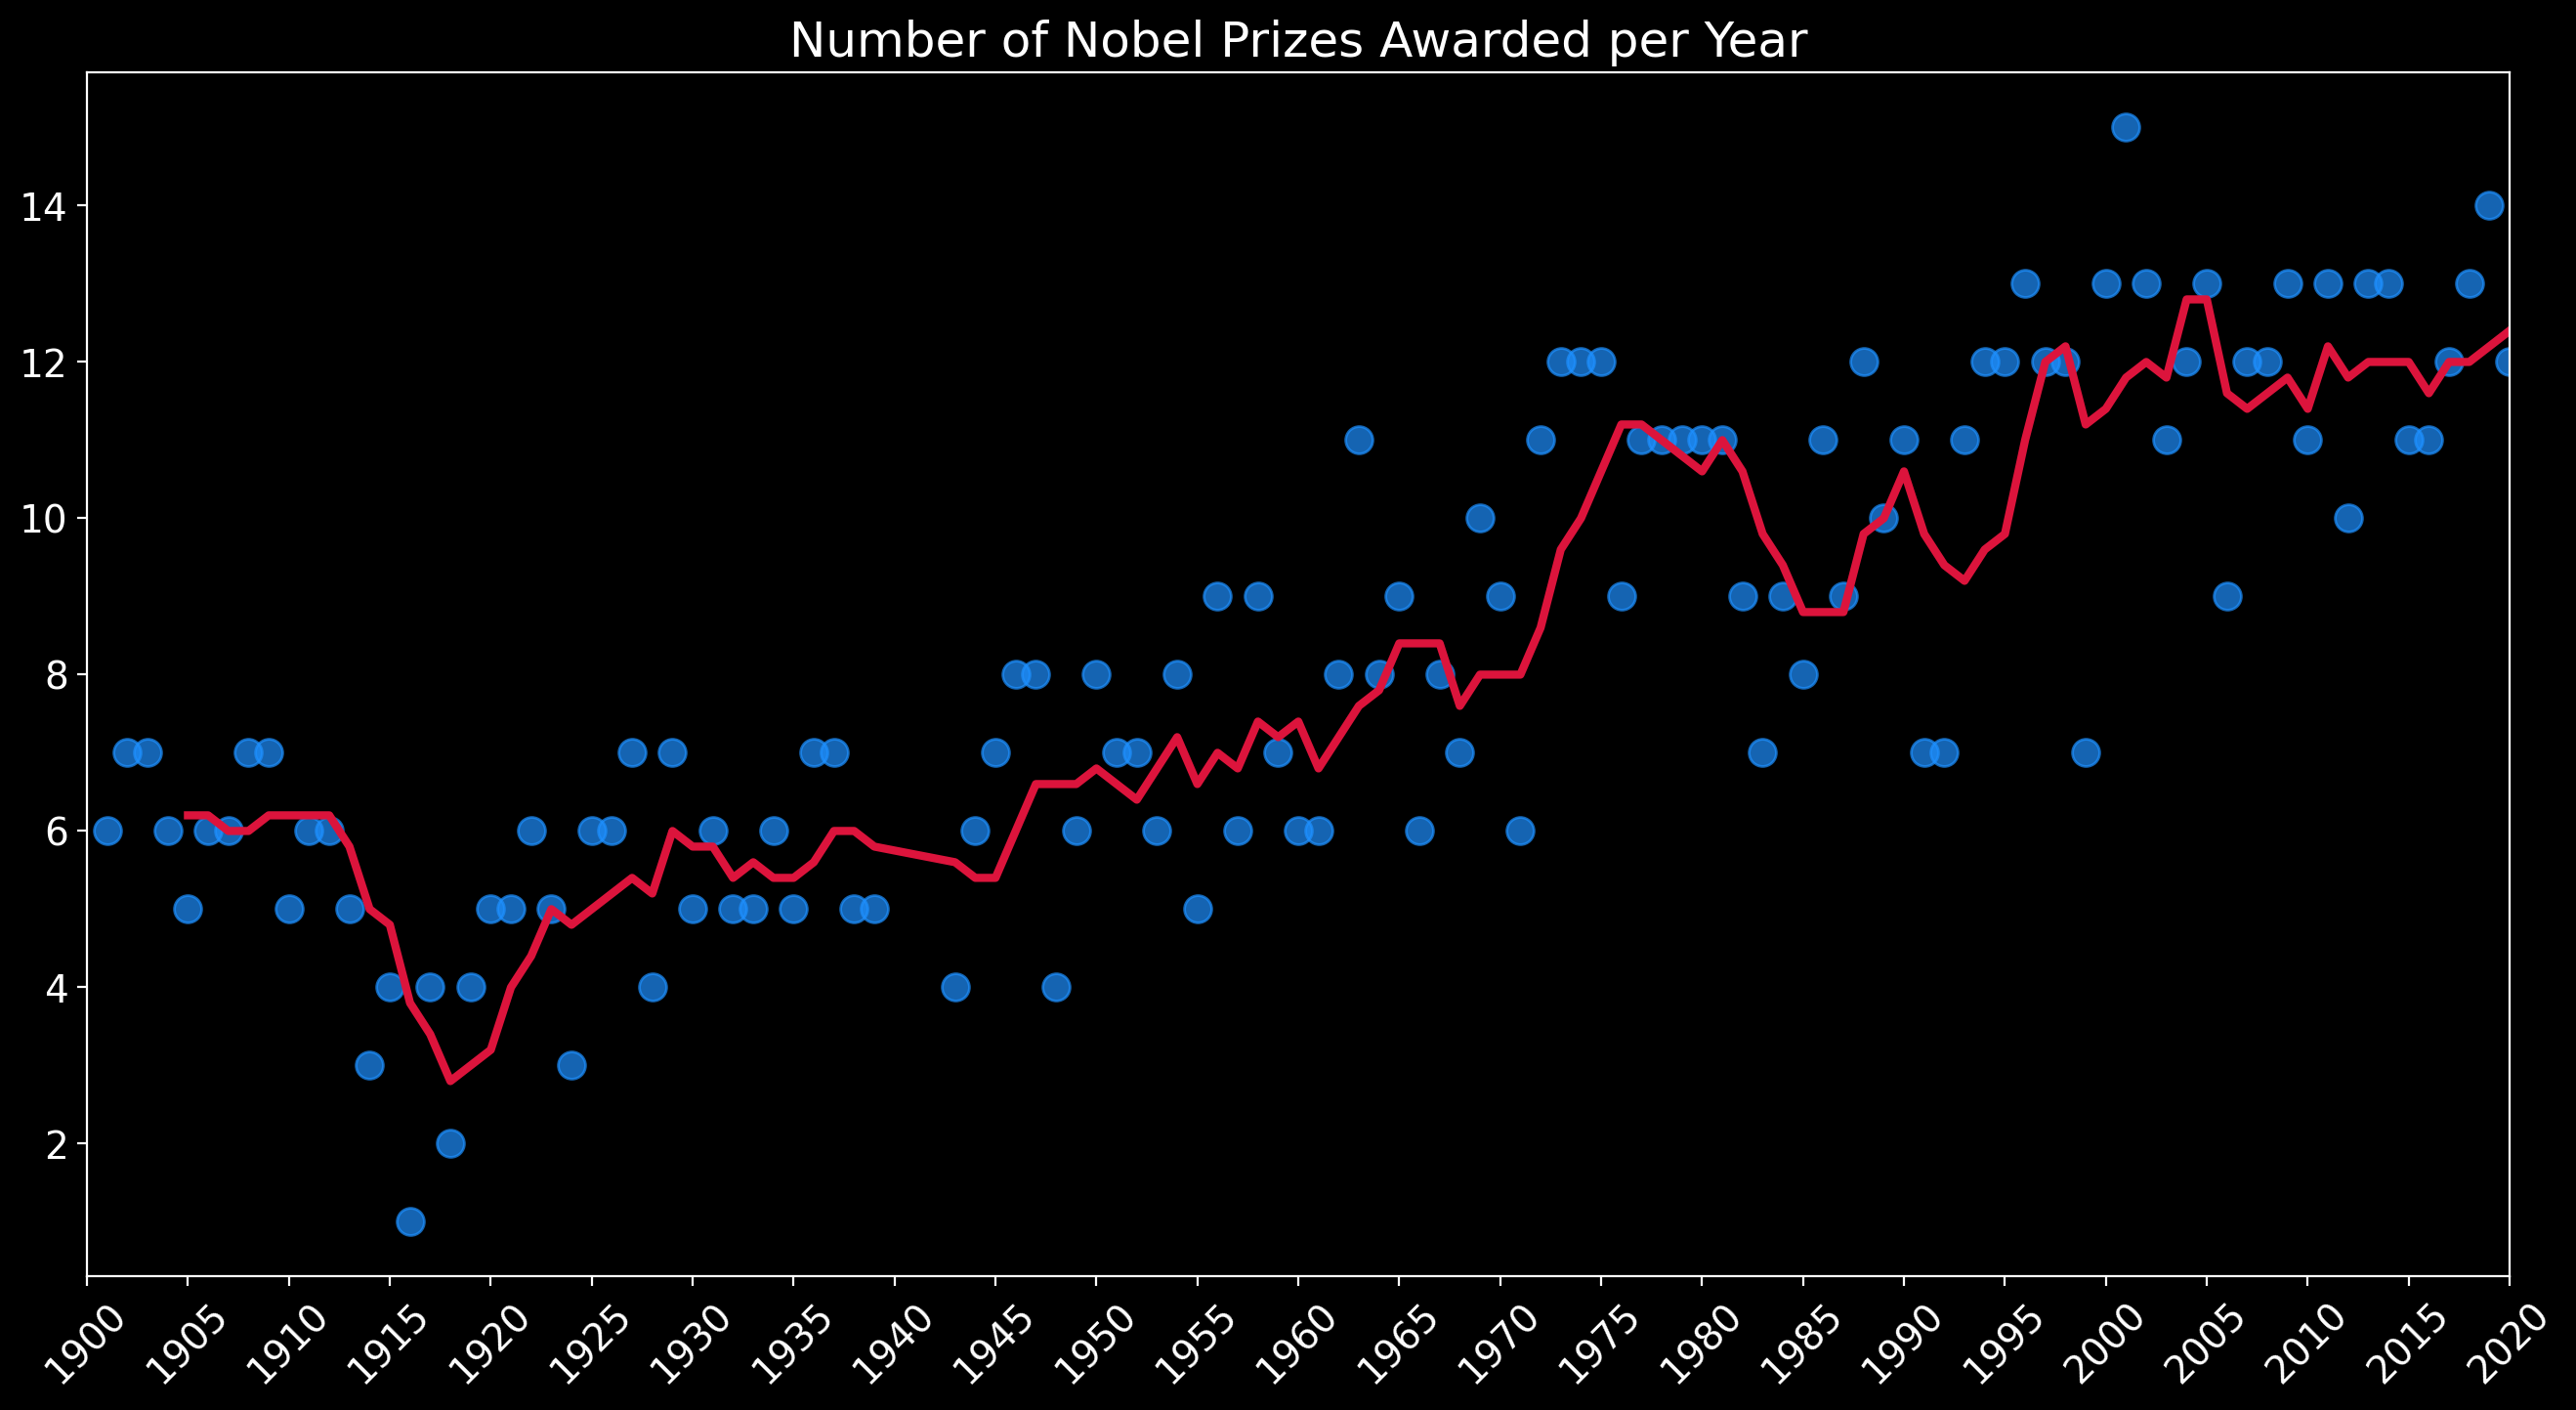

In [28]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize = 14)
plt.xticks(ticks=np.arange(1900,2021, step=5),
        fontsize=14,
        rotation=45)

ax = plt.gca()
ax.set_xlim(1900, 2020)

ax.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=100
)

ax.plot(
    prize_per_year.index,
    moving_avg.values,
    c='crimson',
    linewidth=3
)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [29]:
yearly_avg_share = df_data.groupby(by='year').agg({'share_percent': pd.Series.mean})
share_moving_avg = yearly_avg_share.rolling(window=5).mean()

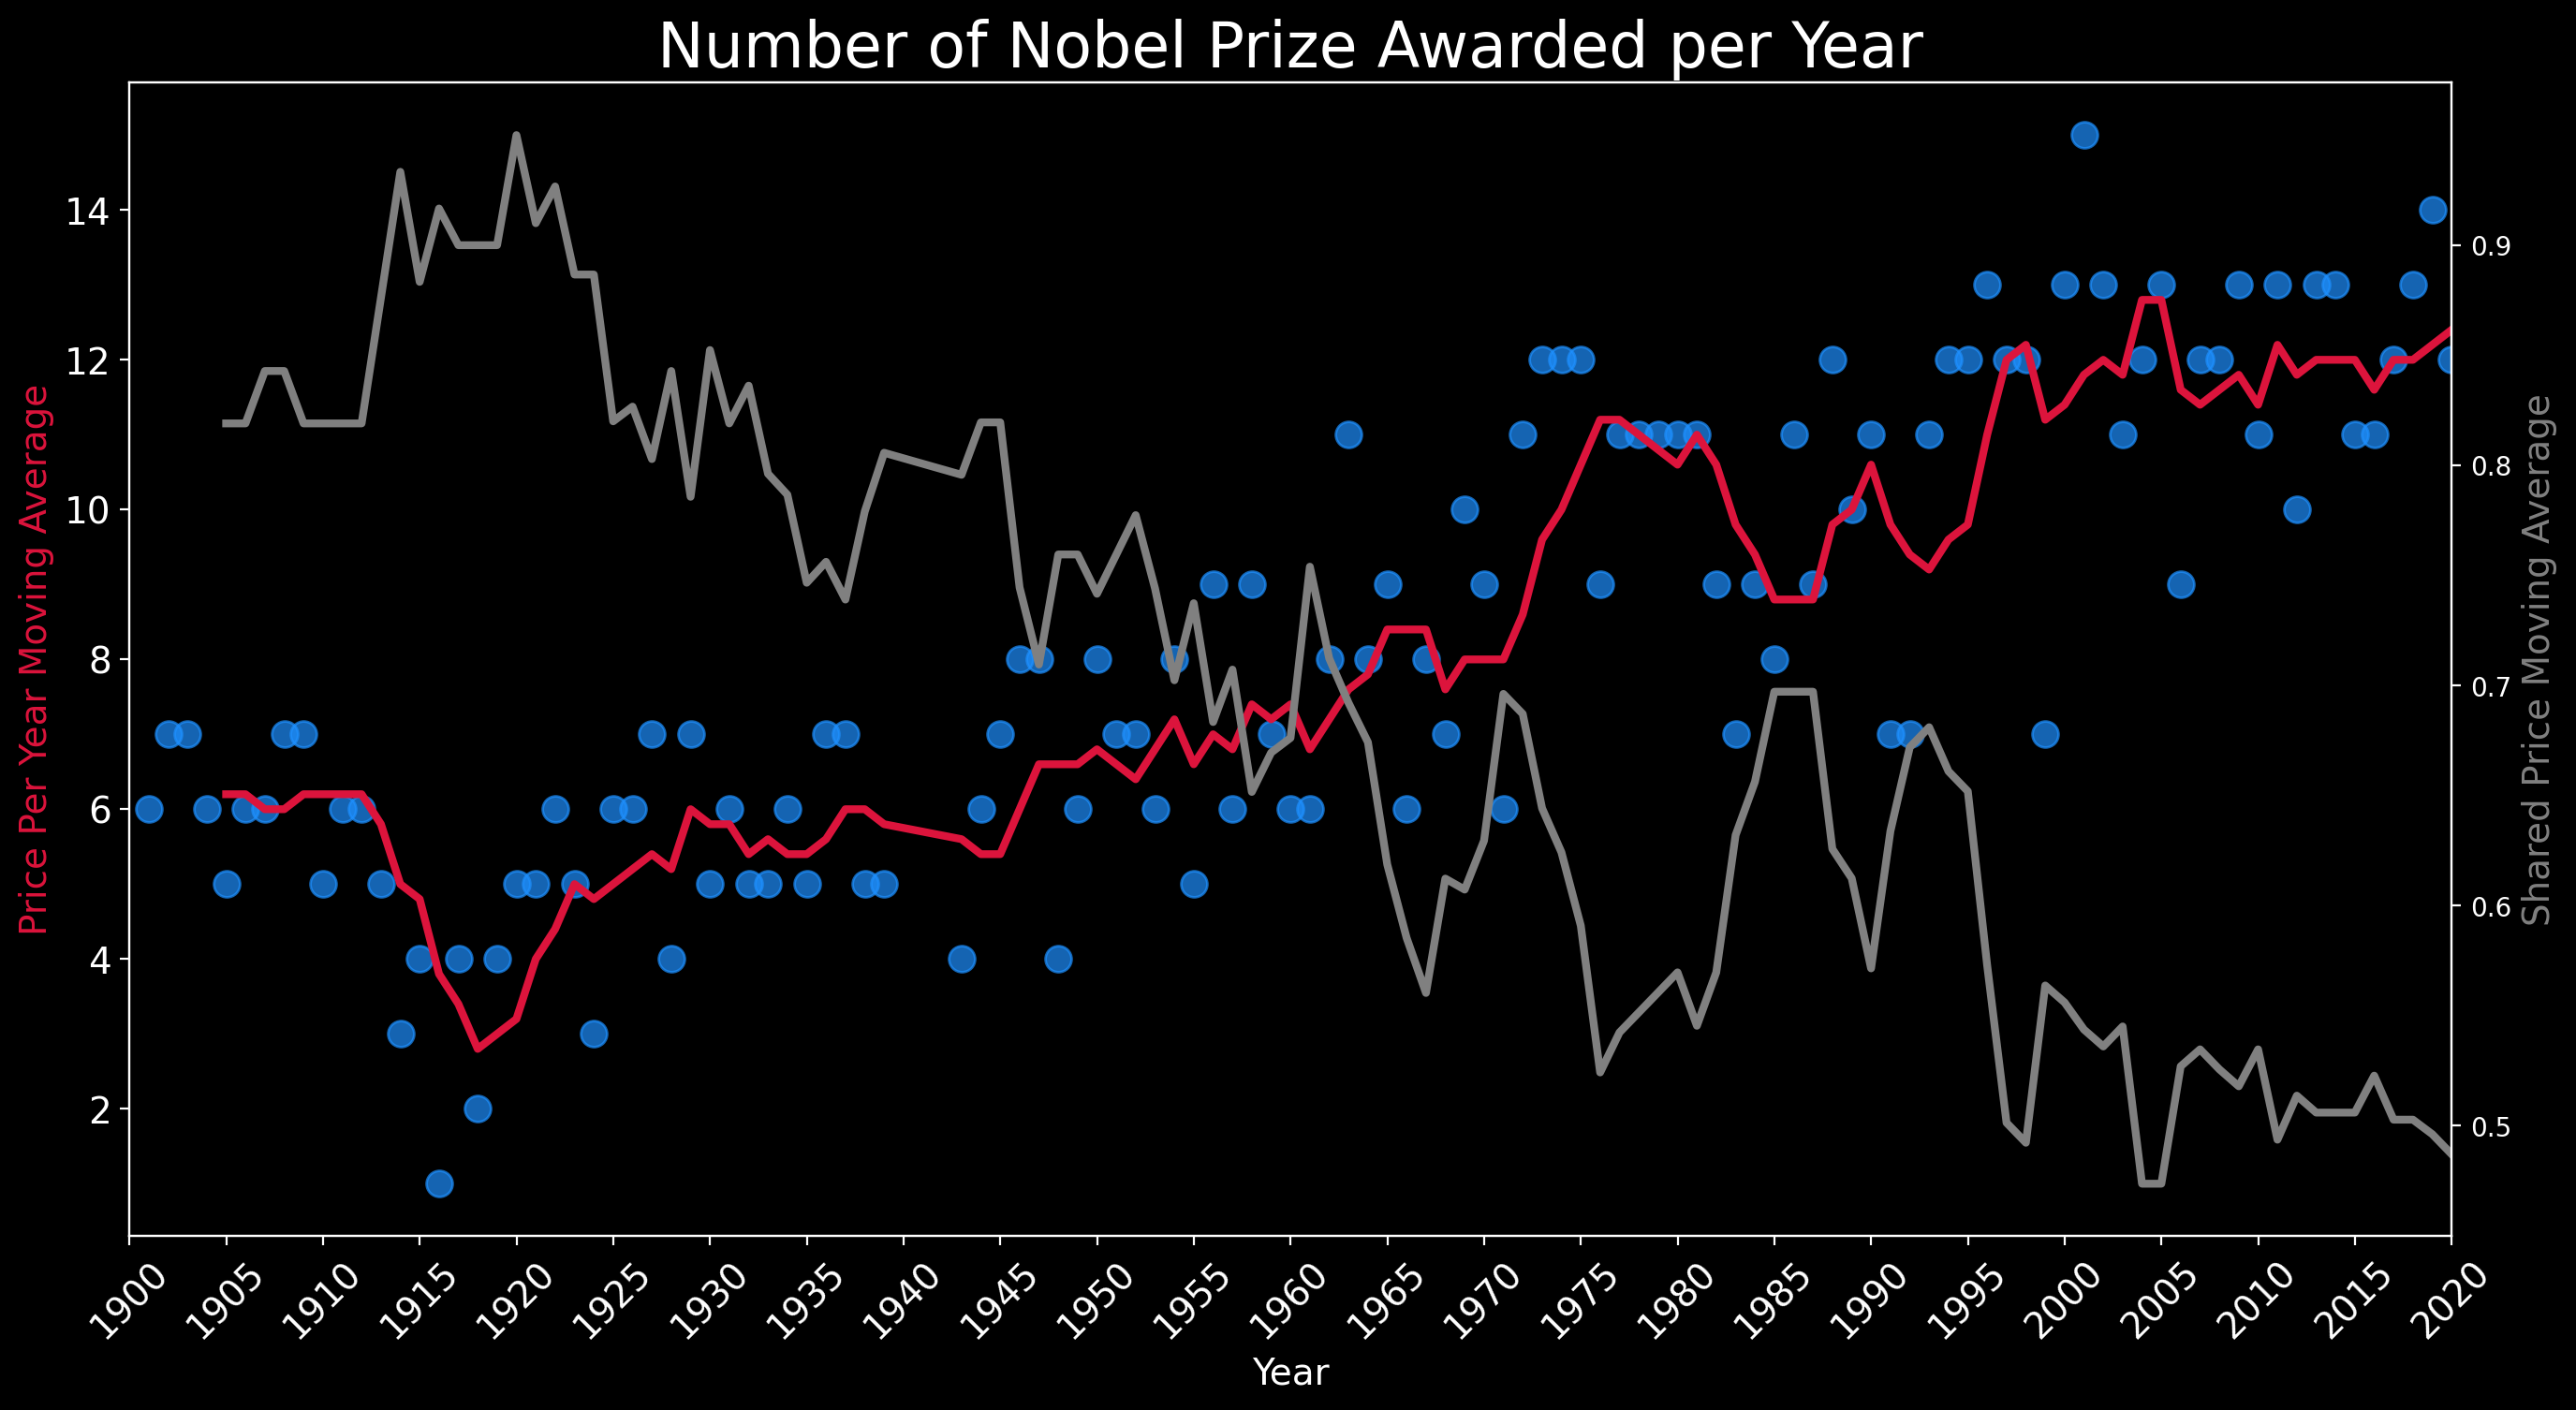

In [30]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prize Awarded per Year', fontsize=24)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,
        ticks=np.arange(1900,2021, step=5),
        rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Price Per Year Moving Average', fontsize=14, color='crimson')
ax2.set_ylabel('Shared Price Moving Average', fontsize=14, color='grey')

ax1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=100
)

ax1.plot(
    prize_per_year.index,
    moving_avg.values,
    c='crimson',
    linewidth=3
)

ax2.plot(
    prize_per_year.index,
    share_moving_avg.values,
    c='grey',
    linewidth=3
)

plt.show()

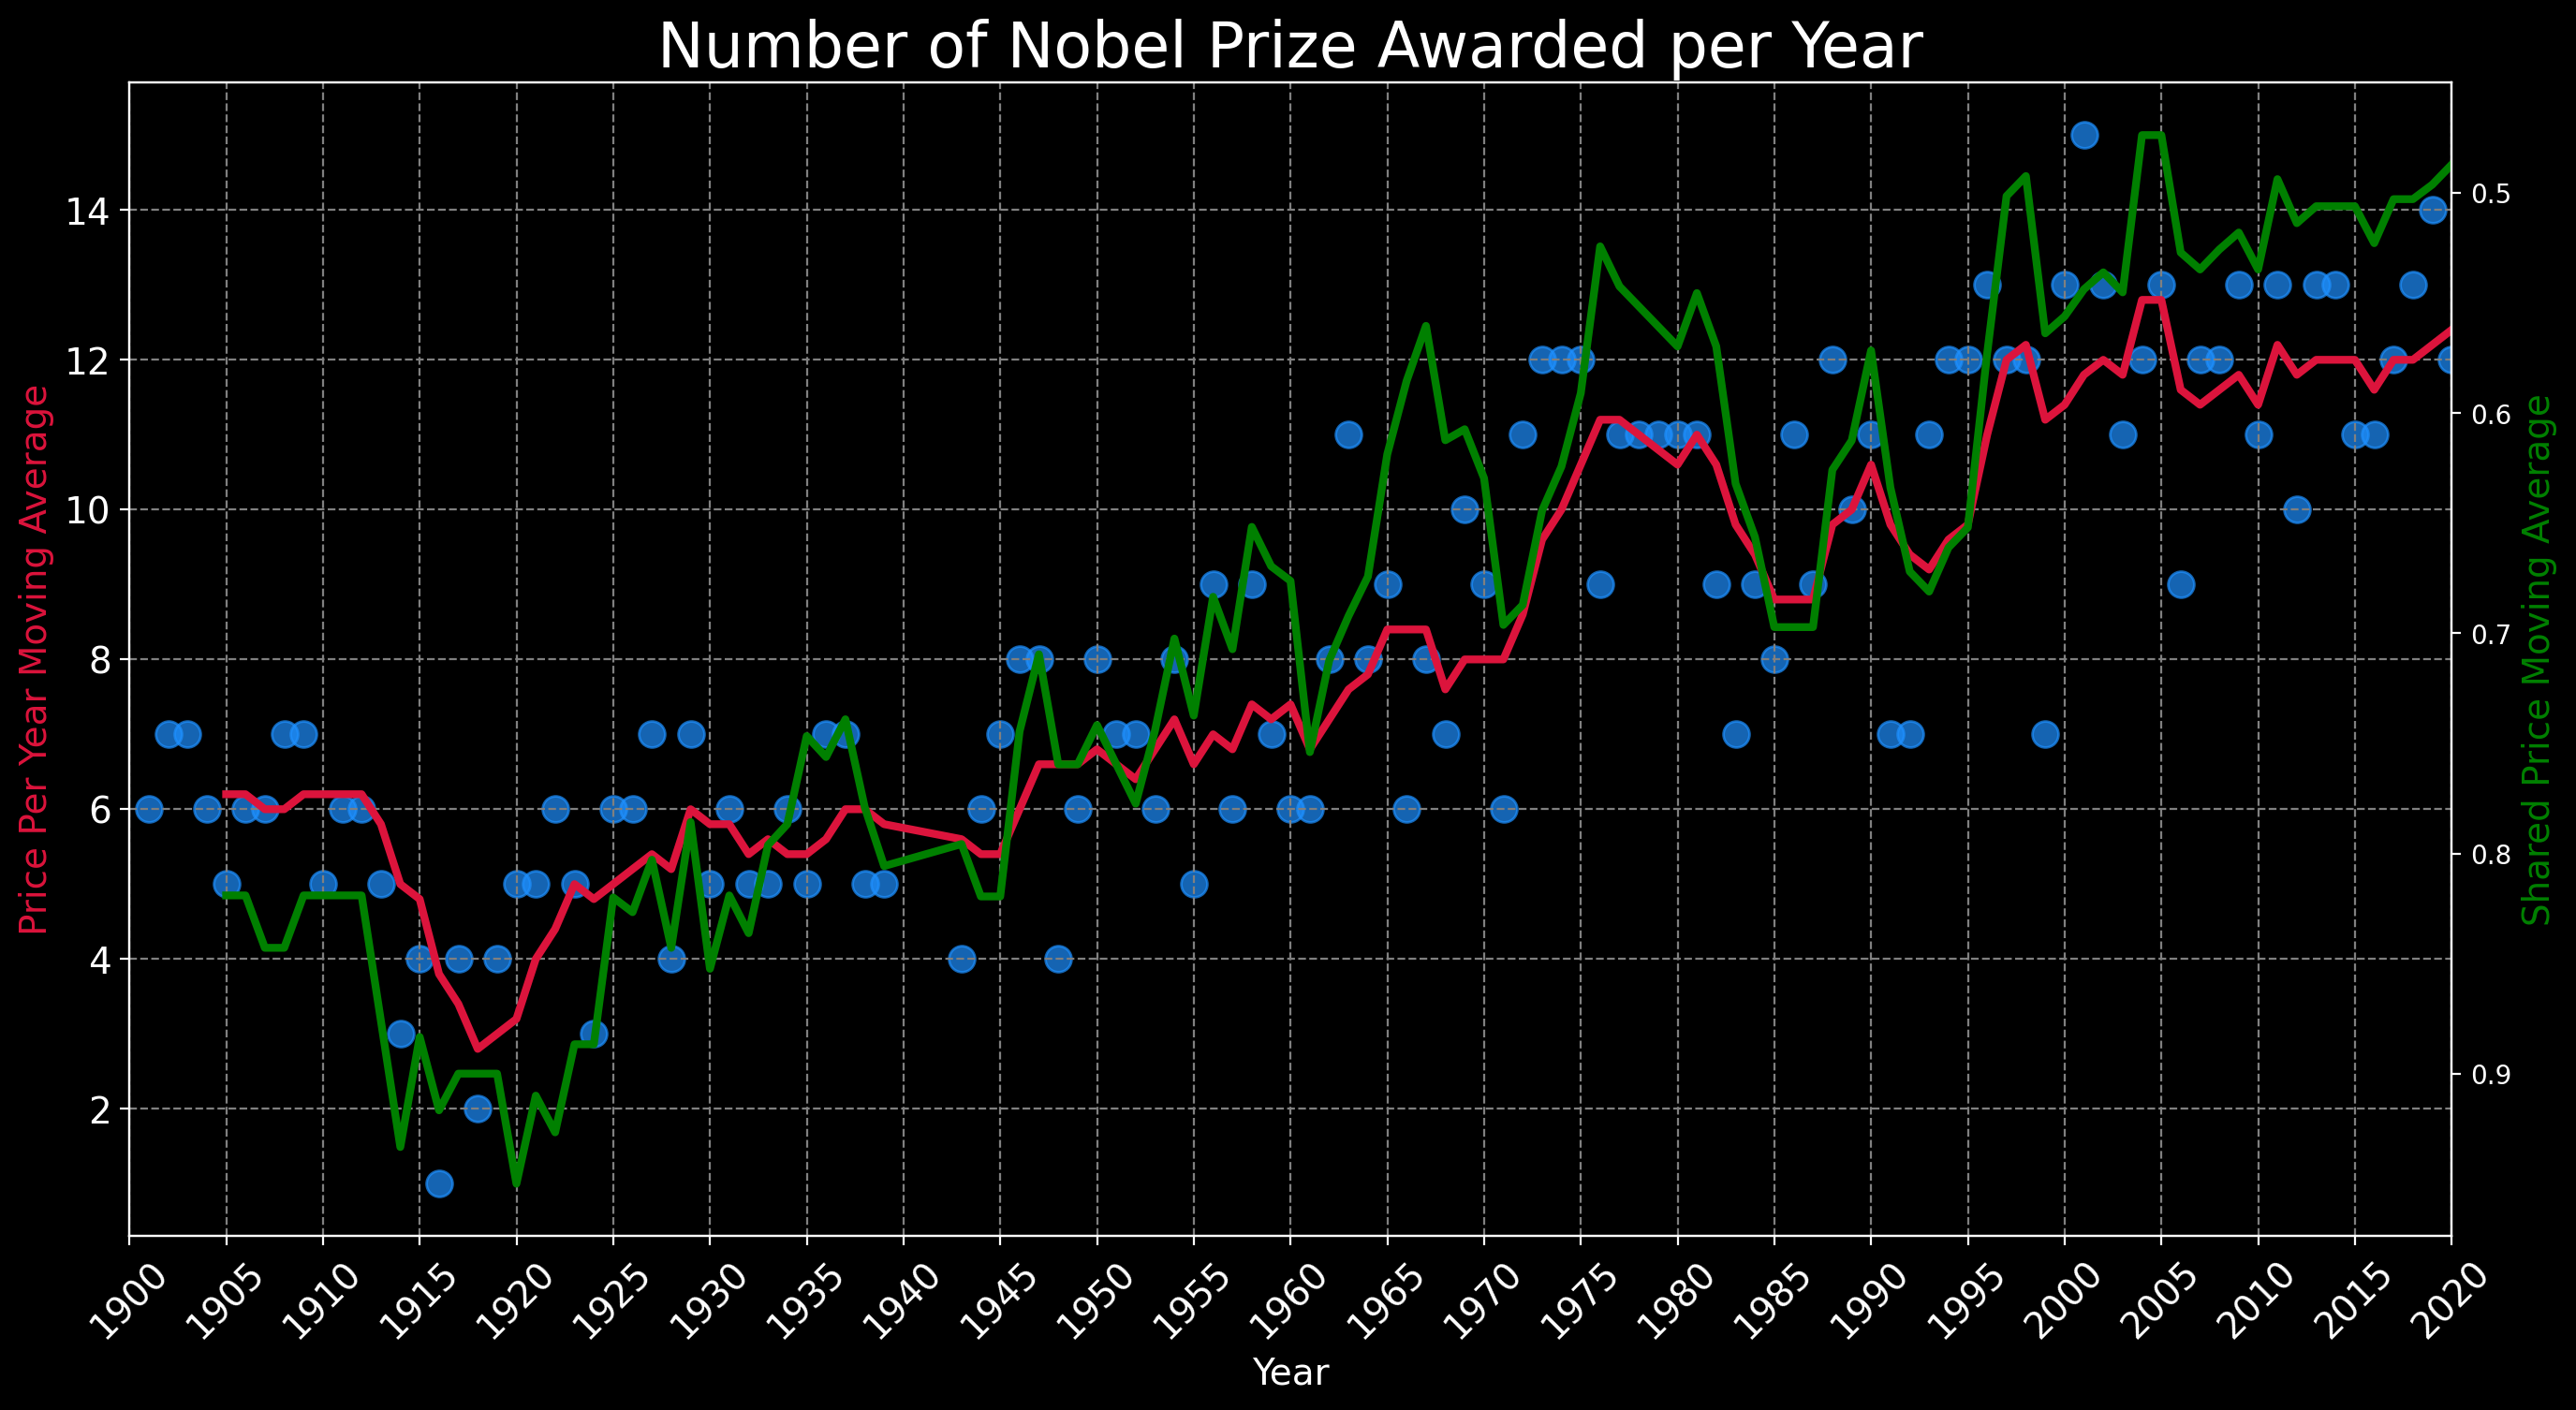

In [31]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title('Number of Nobel Prize Awarded per Year', fontsize=24)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900,2021, step=5),
        fontsize=14,
        rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900,2020)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Price Per Year Moving Average', fontsize=14, color='crimson')
ax2.set_ylabel('Shared Price Moving Average', fontsize=14, color='green')

ax2.invert_yaxis()

ax1.grid(color='grey', linestyle='--')

ax1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=100
)

ax1.plot(
    prize_per_year.index,
    moving_avg.values,
    c='crimson',
    linewidth=3
)

ax2.plot(
    prize_per_year.index,
    share_moving_avg.values,
    c='green',
    linewidth=3
)

plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [32]:
top_countries = df_data.groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=True)
top20_countries = top_countries[-20:]
top20_countries.head(20)


,birth_country_current,prize
33,India,9
31,Hungary,9
65,South Africa,9
2,Australia,10
20,Denmark,12
13,China,12
54,Norway,12
3,Austria,18
51,Netherlands,18
39,Italy,19


In [33]:
df_data.groupby('birth_country',as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False).head(10)

,birth_country,prize
118,United States of America,281
117,United Kingdom,91
45,Germany,65
41,France,54
107,Sweden,29
62,Japan,27
25,Canada,20
108,Switzerland,19
73,Netherlands,18
61,Italy,17


In [34]:
df_data.groupby('organization_country', as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False).head(10)

,organization_country,prize
26,United States of America,368
25,United Kingdom,93
10,Germany,67
9,France,38
23,Switzerland,24
16,Japan,18
22,Sweden,17
20,Russia,12
17,Netherlands,11
4,Canada,9


In [35]:
h_bar = px.bar(
    x=top20_countries.prize,
    y=top20_countries.birth_country_current,
    orientation='h',
    color=top20_countries.prize,
    color_continuous_scale='Viridis',
    title='Top 20 Countries by Number of Prizes',
    height=500,
    width=1000
)

h_bar.update_layout(
    xaxis_title = 'Number of Prizes',
    yaxis_title = 'Country',
    coloraxis_showscale=False
                    )

h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [36]:
col_country_info =['birth_country_current','ISO']
df_countries = df_data.groupby(col_country_info, as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)
df_countries

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
63,Slovakia,SVK,1
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


In [37]:
world_map = px.choropleth(
    df_countries,
    locations= 'ISO',
    color='prize',
    hover_name='birth_country_current',
    color_continuous_scale= px.colors.sequential.Agsunset_r,
    title='World Map showcasing Noble Prize awarded details',
    height=700,
    width=1000,
    scope='world'
)

world_map.update_layout(coloraxis_showscale = True)


world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [38]:
country_cat_cols = ['birth_country_current', 'category']
country_category = df_data.groupby(country_cat_cols, as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)
country_category

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
190,Turkey,Chemistry,1
207,Venezuela,Medicine,1
208,Vietnam,Peace,1
209,Yemen,Peace,1


In [39]:
merged_df = pd.merge(country_category, top20_countries, on='birth_country_current')

merged_df.columns = ['birth_country_current', 'category', 'category_prize', 'total_prize']
merged_df = merged_df.sort_values(by='total_prize')
merged_df

,birth_country_current,category,category_prize,total_prize
61,South Africa,Medicine,3,9
55,Hungary,Chemistry,3,9
58,South Africa,Peace,3,9
81,Hungary,Medicine,2,9
105,Hungary,Economics,1,9
...,...,...,...,...
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
9,United States of America,Peace,19,281
0,United States of America,Medicine,78,281


In [40]:
category_country_bar = px.bar(
    x=merged_df.category_prize,
    y=merged_df.birth_country_current,
    color=merged_df.category,
    orientation='h',
    title='Top 20 Countries by Number of Prizes and Category',
    height=500,
    width=1000
)

category_country_bar.update_layout(
    xaxis_title = 'Number of Prizes',
    yaxis_title = 'Country'
)

category_country_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [41]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
312,1901,Netherlands,1
346,1901,Poland,1
118,1901,France,2
159,1901,Germany,1
440,1901,Switzerland,1
...,...,...,...
244,2019,India,1
221,2020,Germany,1
158,2020,France,1
533,2020,United Kingdom,2


In [53]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes = cumulative_prizes.reset_index()
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [56]:
l_chart = px.line(
    cumulative_prizes,
    x='year',
    y='prize',
    color='birth_country_current',
    hover_name='birth_country_current'
)

l_chart.update_layout(
    xaxis_title = 'Year',
    yaxis_title = 'Number of Prizes'
)

l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [62]:
top20_organizations = df_data.organization_name.value_counts()[:20].sort_values(ascending=True)
top20_organizations

organization_name
Institut Pasteur                                 7
London University                                7
Harvard Medical School                           7
University College London                        7
Cornell University                               8
Bell Laboratories                                8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Max-Planck-Institut                             13
Rockefeller University                          13
Princeton University                            15
Columbia University                             17
California Institute of Technology (Caltech)    17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of

In [81]:
org_bar = px.bar(
    x=top20_organizations.values,
    y=top20_organizations.index,
    orientation='h',
    color=top20_organizations.values,
    color_continuous_scale=px.colors.sequential.haline,
    title='Top 20 Research Institute by Number of Prizes',
    height=500,
    hover_name=top20_organizations.index
)

org_bar.update_layout(
    coloraxis_showscale = False,
    xaxis_title = 'Number of Prizes',
    yaxis_title = 'Research Institute'
)

org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [85]:
org_cities_top20 = df_data.organization_city.value_counts()[:20].sort_values(ascending=True)
org_cities_top20

organization_city
Zurich            8
Göttingen         8
New Haven, CT     9
Heidelberg        9
Boston, MA        9
Munich            9
Moscow           10
Stockholm        10
Oxford           12
Berlin           12
Pasadena, CA     17
Princeton, NJ    19
Chicago, IL      20
Berkeley, CA     21
Stanford, CA     24
Paris            25
London           27
Cambridge        31
New York, NY     45
Cambridge, MA    50
Name: count, dtype: int64

In [97]:
city_bar_top20 = px.bar(
    x=org_cities_top20.values,
    y=org_cities_top20.index,
    orientation='h',
    color=org_cities_top20.values,
    title='Which Cities Do the Most Research?',
    color_continuous_scale=px.colors.sequential.Plasma,
    height=600
)

city_bar_top20.update_layout(
    coloraxis_showscale = False,
    xaxis_title = 'Number of Prizes',
    yaxis_title = 'City'
)

city_bar_top20.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [102]:
cities_nobel_born_top20 = df_data.birth_city.value_counts()[:20].sort_values(ascending=True)
cities_nobel_born_top20

birth_city
Breslau (Wroclaw)         3
Pittsburgh, PA            4
Cairo                     4
Montreal                  4
Frankfurt-on-the-Main     5
Prague                    5
Stockholm                 6
Hamburg                   6
Munich                    7
Moscow                    7
Washington, DC            8
Brooklyn, NY              8
Budapest                  8
Boston, MA                8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: count, dtype: int64

In [106]:
city_nobel_born_bar = px.bar(
    x=cities_nobel_born_top20.values,
    y=cities_nobel_born_top20.index,
    color=cities_nobel_born_top20.values,
    orientation='h',
    title='Where were the Top Nobel Laureates Born?',
    height=600,
    color_continuous_scale=px.colors.sequential.Plasma
)

city_nobel_born_bar.update_layout(
    coloraxis_showscale = False,
    xaxis_title = 'Number of Prizes Awarded',
    yaxis_title = 'City of Birth'
)

city_nobel_born_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [110]:
org_col_subset = ['organization_country', 'organization_city', 'organization_name']
country_city_org = df_data.groupby(by=org_col_subset, as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
8,Austria,Innsbruck,Innsbruck University,1
6,Austria,Altenberg; Grünau im Almtal,Konrad-Lorenz-Institut der Österreichischen Ak...,1
5,Australia,Weston Creek,Australian National University,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1


In [127]:
burst_chart = px.sunburst(
    country_city_org,
    path=org_col_subset,
    values='prize',
    title='Where do Discoveries Take Place?',
    height=1000,
    # color=country_city_org.organization_country,
    # color_continuous_scale=px.colors.sequential.Agsunset
)

burst_chart.update_layout(
    xaxis_title = 'Number of Prizes',
    yaxis_title = 'City',
    coloraxis_showscale = False
)

burst_chart.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 
